In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn as sk
print(sk.__version__)

1.0.2


In [ ]:
!pip install -U scikit-learn==1.0.2

In [ ]:
#read data
data =pd.read_csv('/content/drive/MyDrive/MLAssignment02/Iris.csv')

In [ ]:
#check the head
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#check the shape of dataset
data.shape

(150, 6)

In [ ]:
#check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#check the description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#check the null values in our dataset
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#check the number of counts of different sepecies in our dataset
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


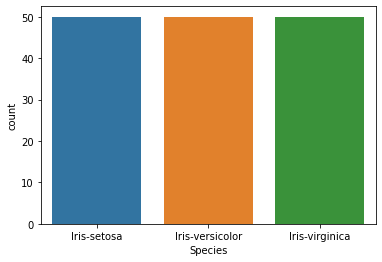

In [ ]:
sns.countplot(data['Species'])

In [ ]:
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


No handles with labels found to put in legend.


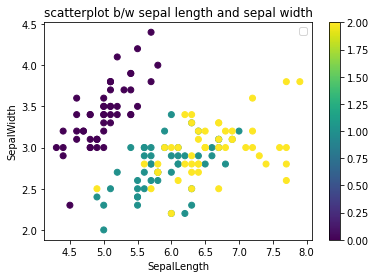

In [ ]:
##scatterplot between sepal Length and sepal width
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Species'])
plt.colorbar()
plt.title('scatterplot b/w sepal length and sepal width')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

In [ ]:
#delete id from dataset
data.drop('Id',axis=1,inplace=True)

In [ ]:
#Seperate dependent and independent feature
x = data.drop('Species',axis=1)
y = data['Species']

In [ ]:
#split it into training and testing part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#check the shape train and tes
print('Train Shape', x_train.shape, y_train.shape )
print('Test Shape', x_test.shape, y_test.shape)

Train Shape (120, 4) (120,)
Test Shape (30, 4) (30,)


In [ ]:
#Build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict for training as well as testing 
tr_predict = model.predict(x_train)
ts_predict = model.predict(x_test)

In [ ]:
#check the accuracy for training as well as testing
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(y_train, tr_predict))
print('Testing accuracy:', accuracy_score(y_test, ts_predict))

Training accuracy: 1.0
Testing accuracy: 1.0


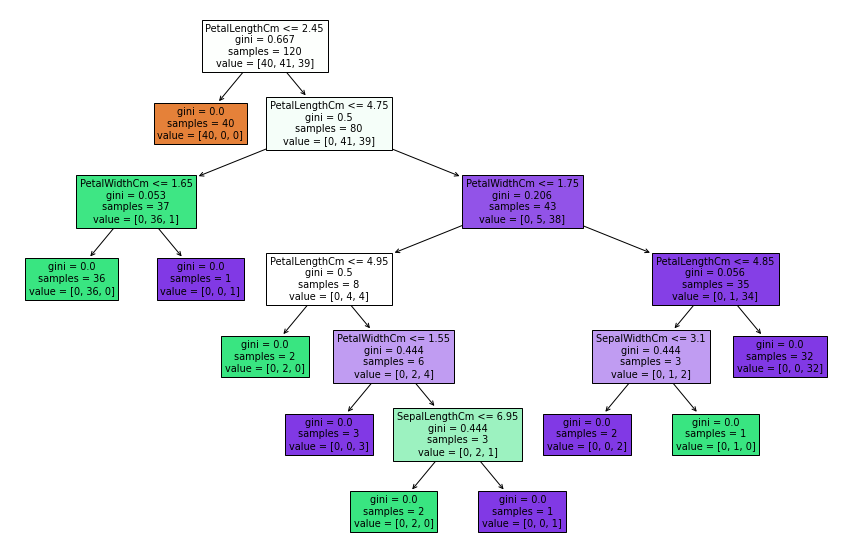

In [ ]:
#plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=x.columns)
plt.savefig('Iris-Decision Tree')
plt.show()

In [ ]:
df_importance = pd.DataFrame({'Features': x.columns, 'Importances' : model.feature_importances_})
df_importance

,Features,Importances
0,SepalLengthCm,0.016670
1,SepalWidthCm,0.016670
2,PetalLengthCm,0.889473
3,PetalWidthCm,0.077186


In [ ]:
import pickle
with open('iris_classifier.pickle', 'wb') as f:
  pickle.dump(model,f)